<a href="https://colab.research.google.com/github/qNikitaMolodec/Star-classification/blob/main/star_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Датасет содержит 100,000 наблюдений космоса в рамках проекта Sloan Digital Sky Survey (SDSS). Каждое наблюдение содержит 18 признаков.

Весь перечень признаков:
1. obj_ID = идентификатор объекта
2. alpha = прямой угол восхождения (Right Ascension angle)
3. delta = угол склонения (Declination angle)
4. u = интенсивность при наличии ультрафиолетового фильтра
5. g = интенсивность при наличии зеленого фильтра
6. r = интенсивность при наличии красного фильтра
7. i = Интенсивность при наличии фильтра ближнего инфракрасного диапазона
8. z = Интенсивность при наличии инфракрасного фильтра
9. run_ID = номер запуска
10. rereun_ID = номер повтора, чтобы указать, как было обработано изображение.
11. cam_col = столбец камеры для определения строки сканирования в пределах прогона.
12. field_ID = номер поля для идентификации каждого поля
13. spec_obj_ID = Уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что два разных наблюдения с одинаковым spec_obj_ID должны иметь общий выходной класс)
14. class = класс объекта
15. redshift = значение красного смещения
16. plate = Идентификатор номера, идентифицирует каждый номер в SDSS.
17. MJD = Modified Julian Date,
18. fiber_ID = идентификатор волокна, который идентифицирует волокно, направляющее свет в фокальную плоскость в каждом наблюдении

In [2]:
url = 'https://raw.githubusercontent.com/qNikitaMolodec/Star-classification/main/star_classification.csv'
data = pd.read_csv(url)
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Посмотрим распределение объектов по классам

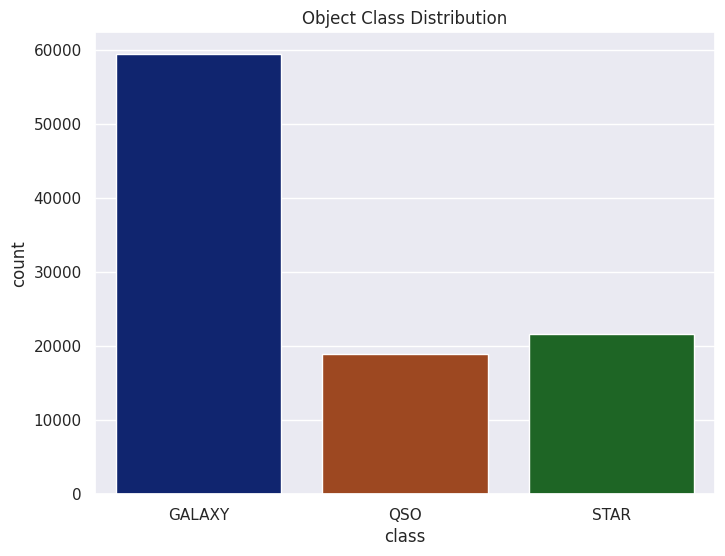

In [4]:
plt.figure(figsize=(8, 6))

sns.set(style='darkgrid', palette="dark")
sns.countplot(x = data['class'])

plt.title('Object Class Distribution')
plt.show()

Можно обратить внимание, что галактик в данном датасете существенно больше, чем других классов.

Проиллюстрируем распределения некоторых признаков объектов с учетом их классов

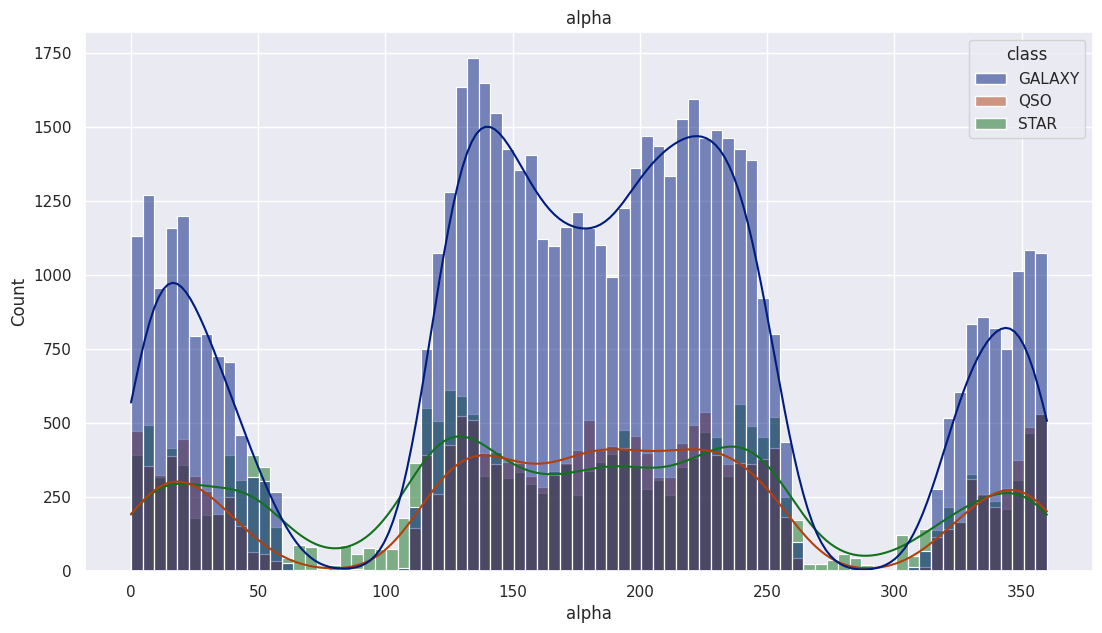

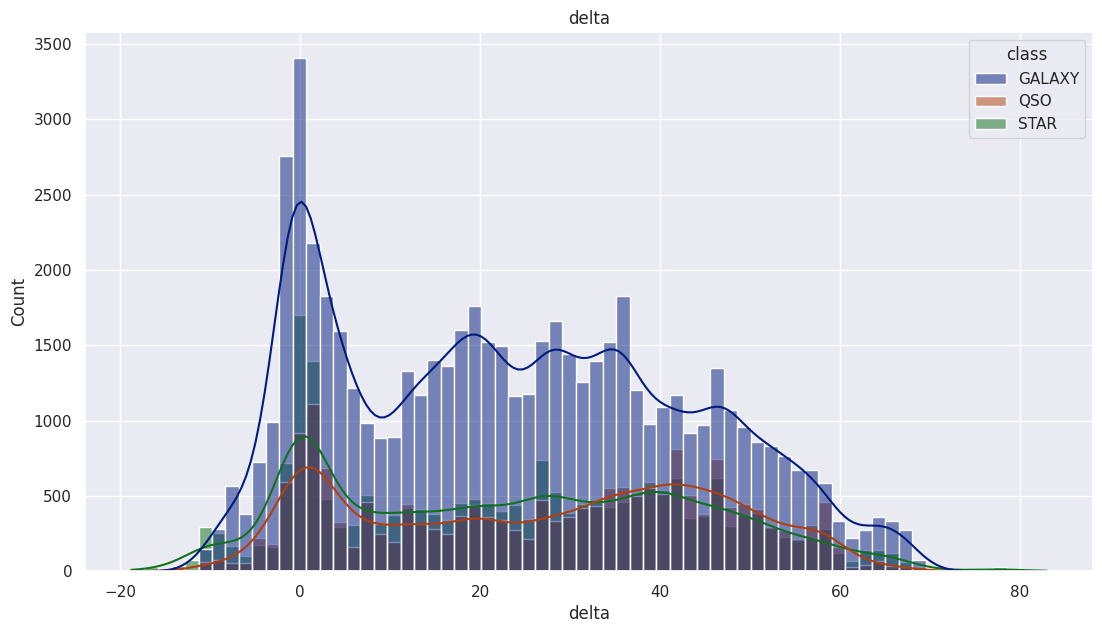

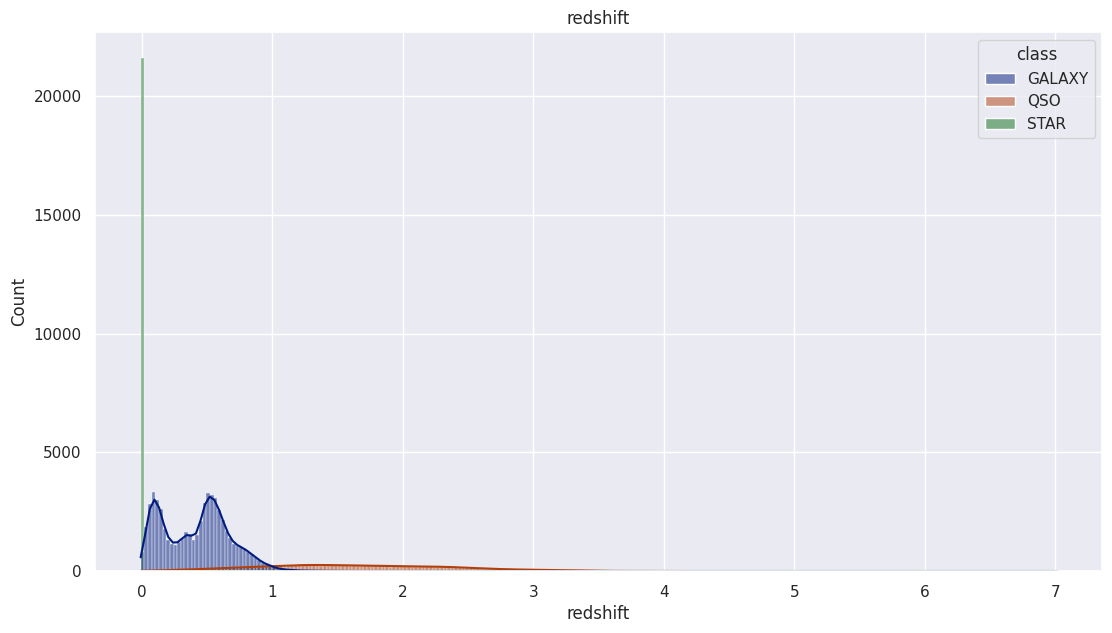

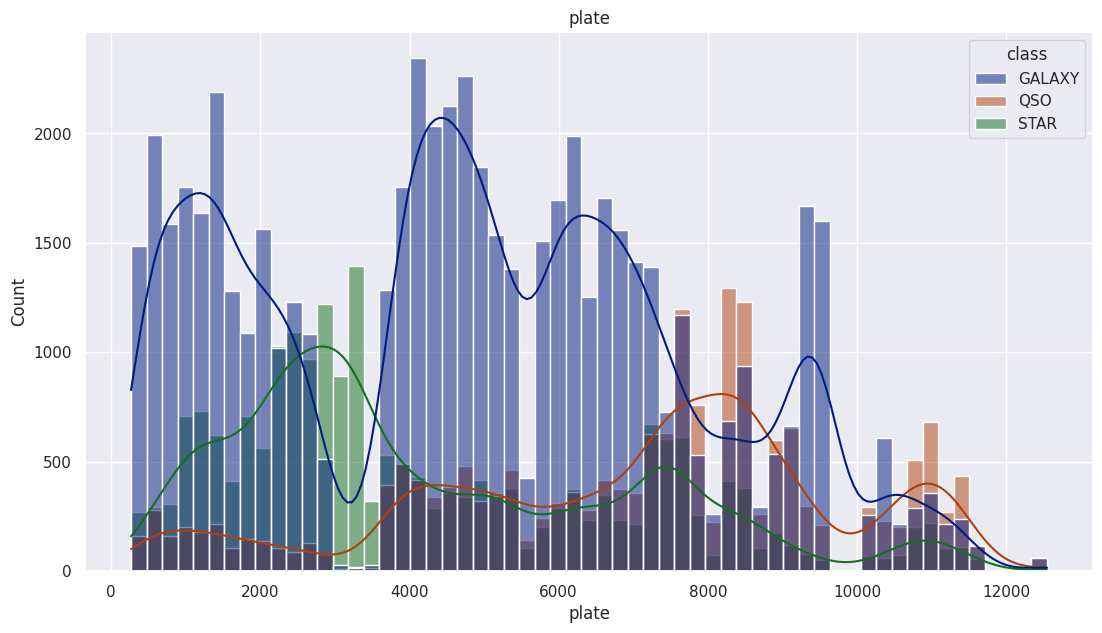

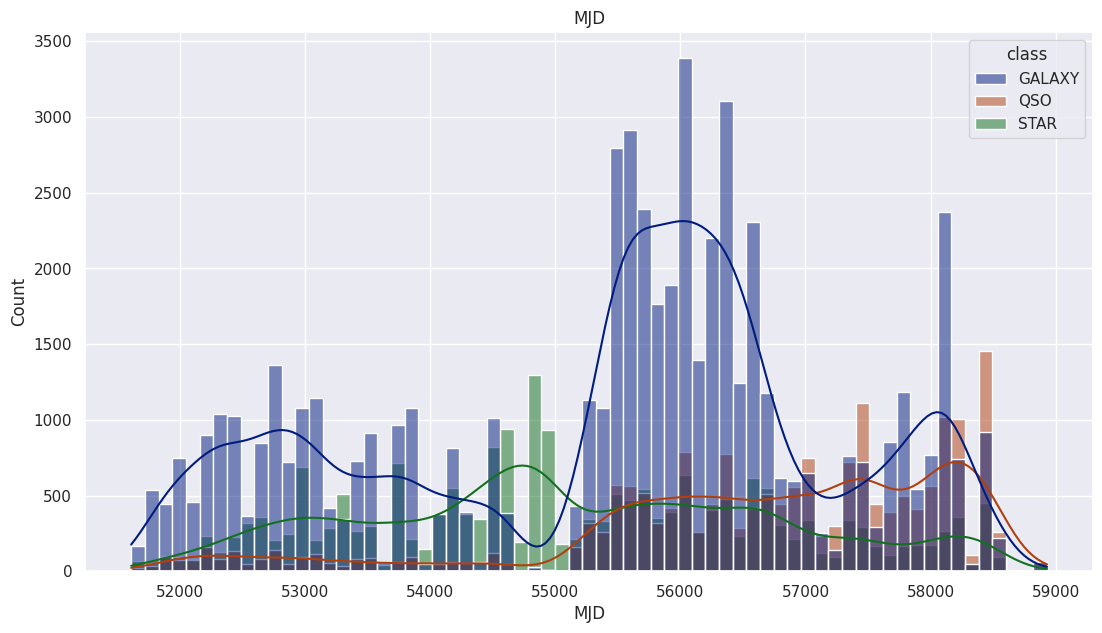

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=data, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

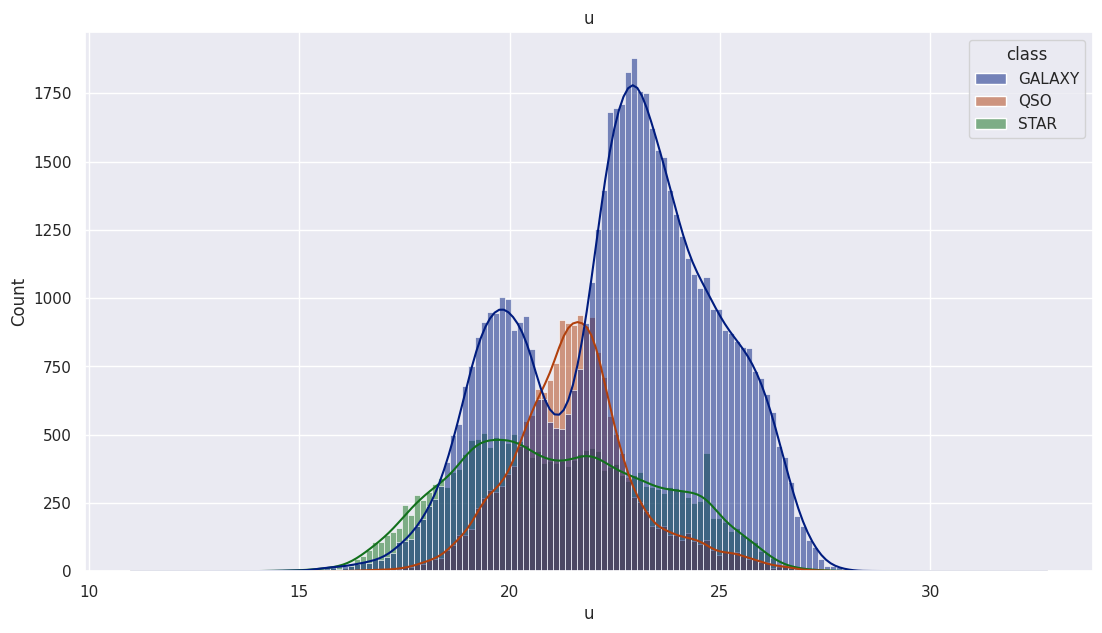

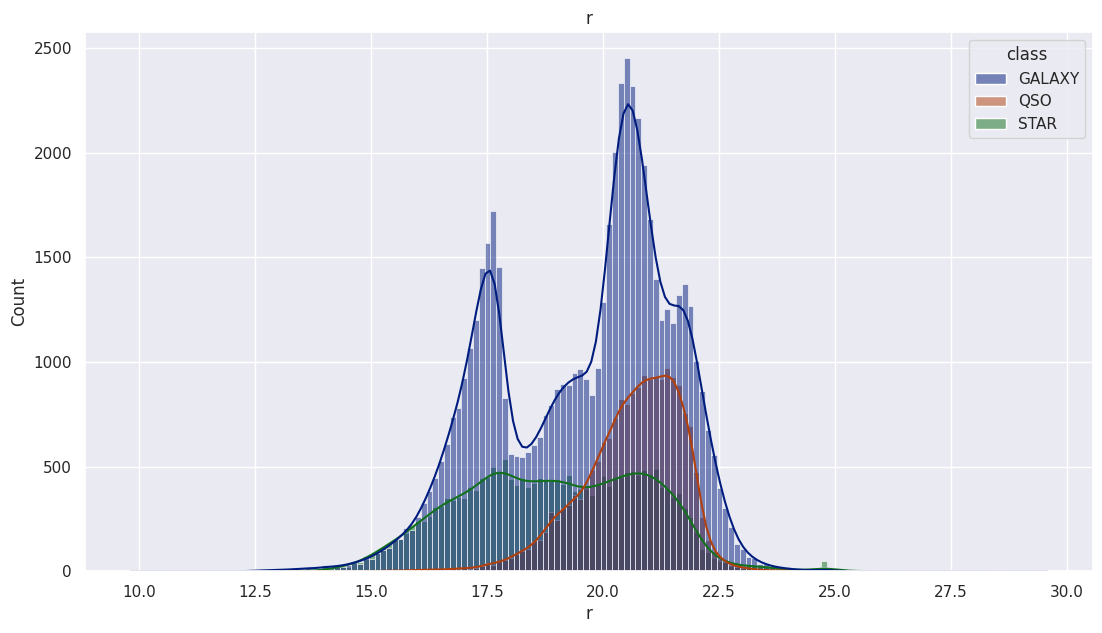

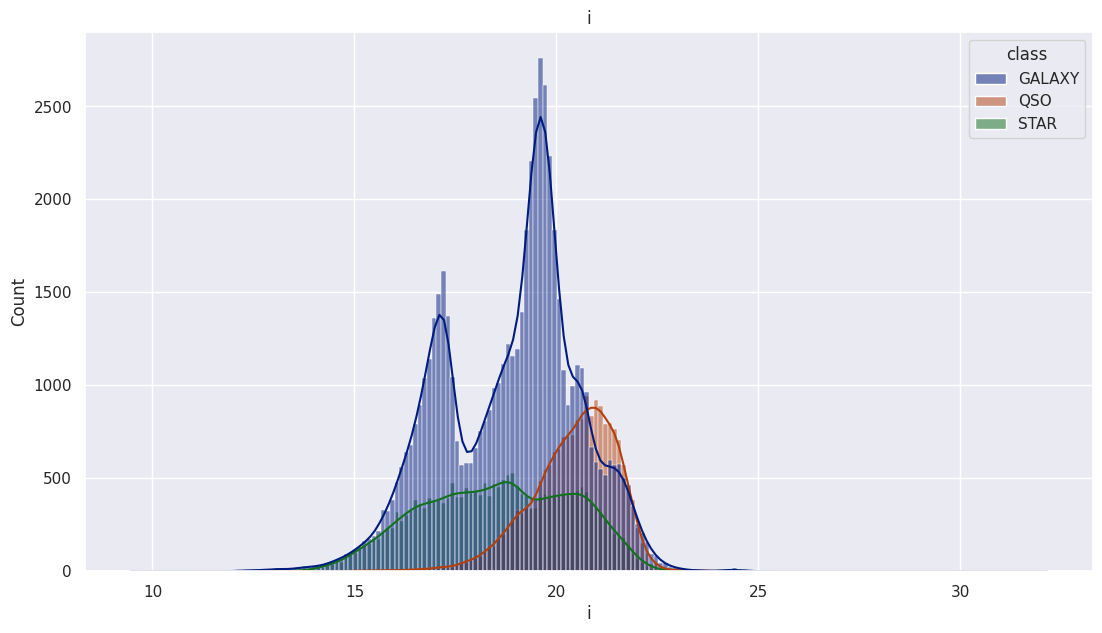

In [ ]:
for i in ['u','r', 'i']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=data[data.u>-100], x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

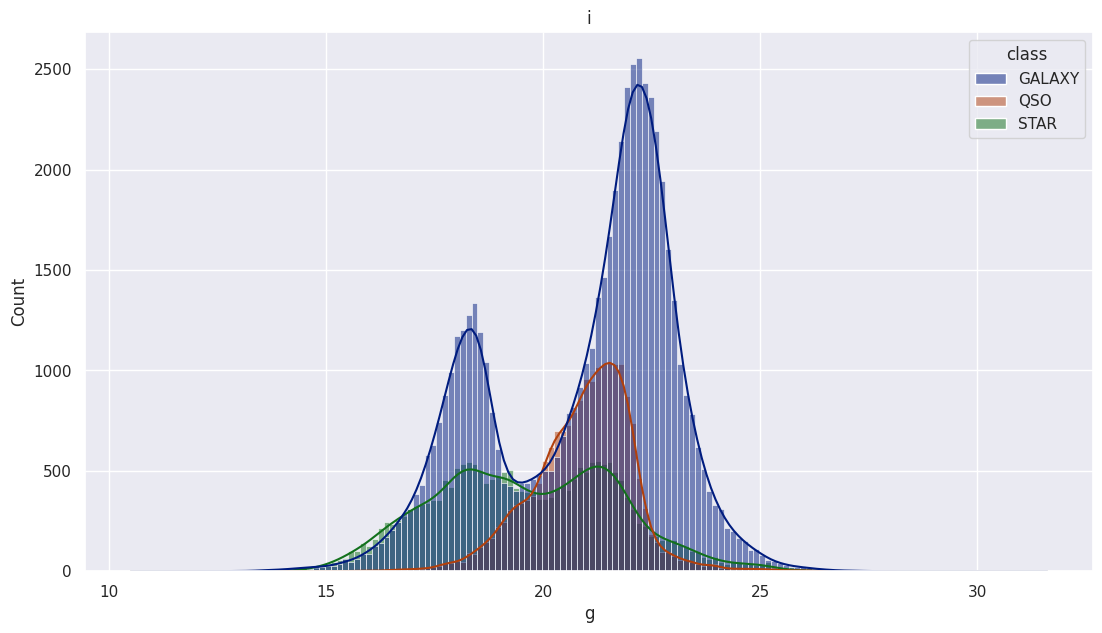

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data=data[data.g>-100], x='g', kde=True, hue="class")
plt.title(i)
plt.show()

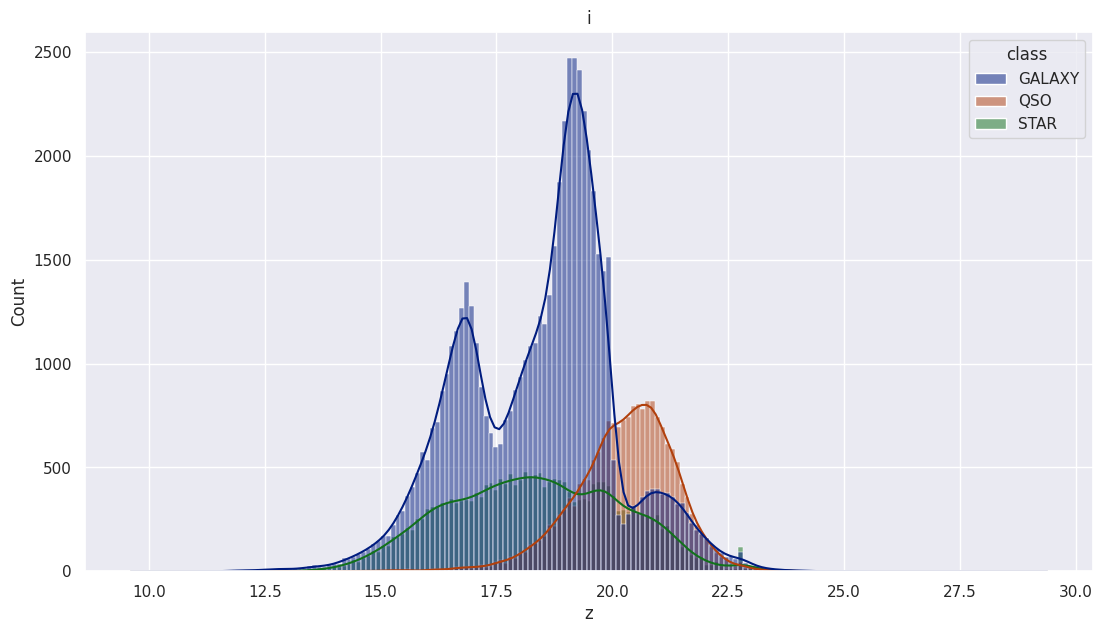

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data=data[data.z>-100], x='z', kde=True, hue="class")
plt.title(i)
plt.show()

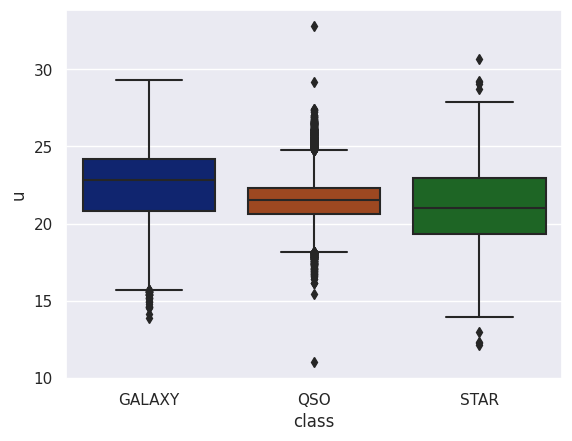

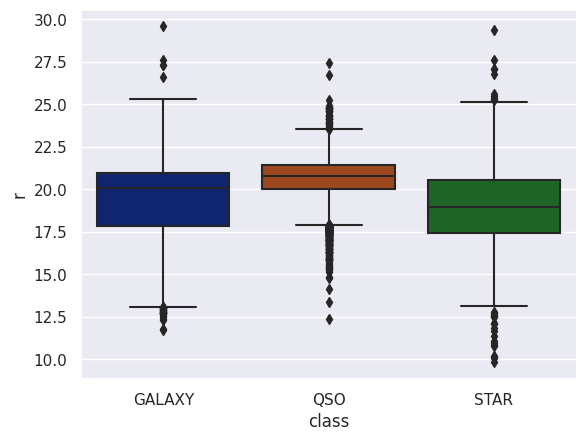

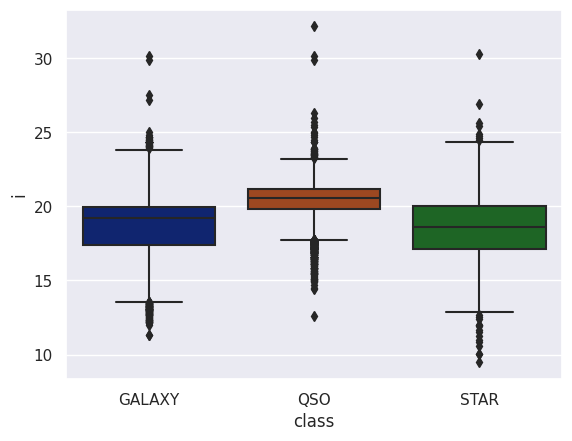

In [ ]:
for i in ['u','r', 'i']:
    plt.figure()
    sns.boxplot(x="class",y=i,data=data[data.u>-100])
    # sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
    plt.show()

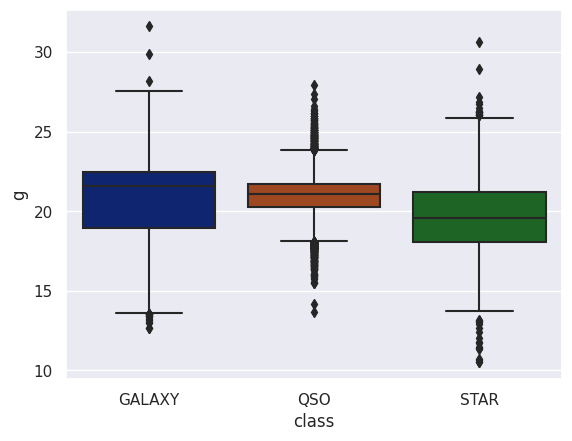

In [ ]:
plt.figure()
sns.boxplot(x="class",y='g',data=data[data.g>-100])
# sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
plt.show()

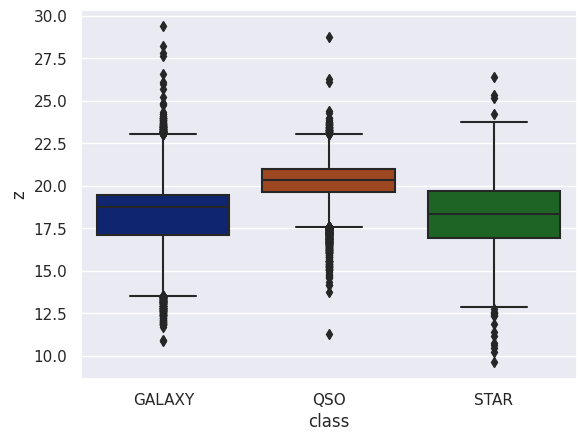

In [ ]:
plt.figure()
sns.boxplot(x="class",y='z',data=data[data.z>-100])
# sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
plt.show()

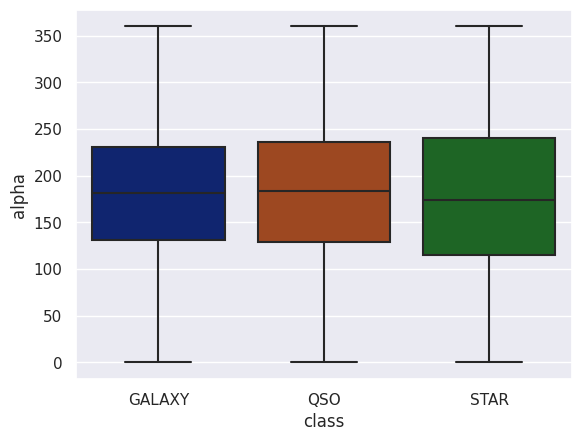

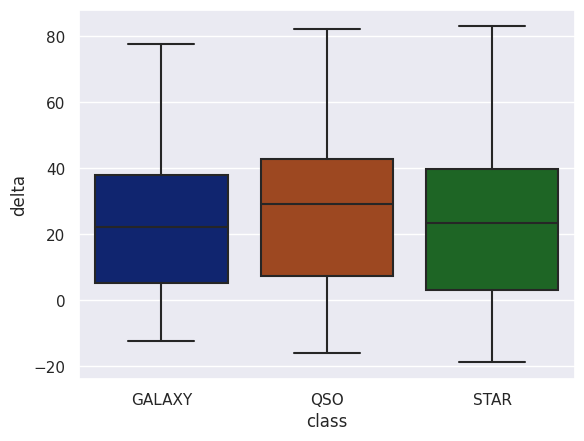

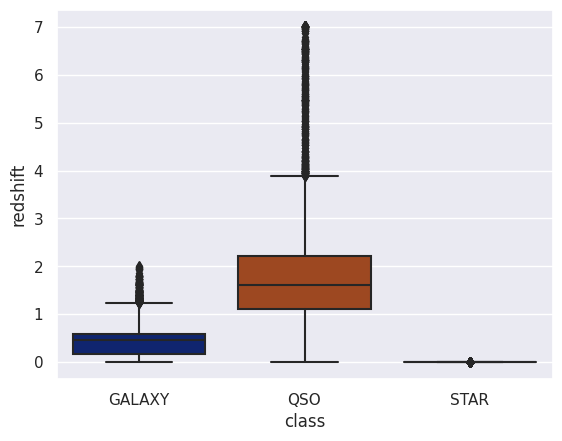

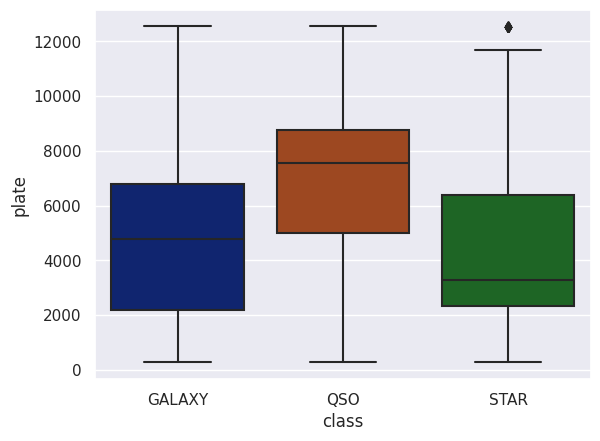

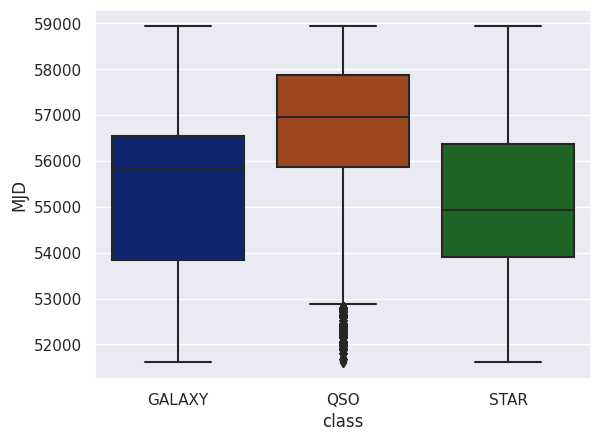

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD']: #YOUR CODE HERE
    plt.figure()
    sns.boxplot(x="class",y=i,data=data)
    # sns.swarmplot(x='class',y=i,data=data,color='white',linewidth=1,edgecolor='k')
    plt.show()

По этим данным мы видим, что в некоторых случаях распределения для разных классов схожи (имеют общие положения пиков). В некоторых случаях (например, в распределении по дате MJD, углу восхождения и склонения) это можно объяснить причинами, не зависящими от физики процесса (данные могли быть получены в рамках одной исследовательской программы).

Однако есть распределения, которые являются характерными для данного класса: таковым, например, являются параметры redshift. Так, у представителей класса звёзд наблюдаем нулевое значение среднего и дисперсии, у представителей класса квазаров среднее значение и дисперсия самые большие. Распределения интенсивностей при наличии фильтров также являются характерными для каждого класса: распределение от галактик имеет 2 выраженных пика, среднее для распределения для квазаров сдвигается вправо при увеличении длины волны, среднее для распределения для звёзд сдвигается наоборот влево. В дальнейшем эти свойства могут помочь в построении алгоритма классификации объектов датасета.

Например, можно проверять различные гипотезы, сравнивая непрерывные параметры между разными группами. К парамметрическим выборкам можно применить критерии Стьюдента и ANOVA,преждевременно убедившись в том, что данные распределены нормально(тест Шапиро-Уилка, Колмогорова-Смирнова). В противном случае для "плохих" распределений будем использовать другие непарамметрические критерии. В результате проверки гипотез выберем наиболее подходящие признаки и алгоритм для классификации объектов на 3 группы.

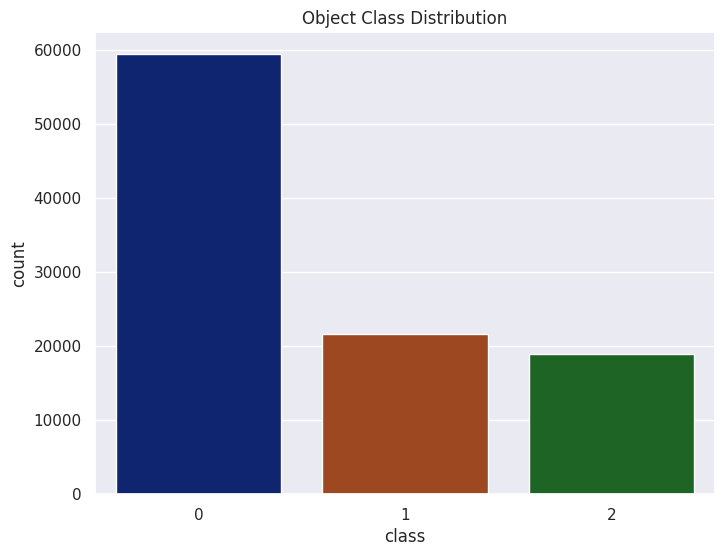

In [5]:
# Перевод текстового признака в числовой
data["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in data["class"]]
plt.figure(figsize=(8, 6))

sns.set(style='darkgrid', palette="dark")
sns.countplot(x = data['class'])

plt.title('Object Class Distribution')
plt.show()

Чистка от выбросов:

In [6]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(data)

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()
len(outlier_index)

data.drop(outlier_index, inplace=True)

Выберем подходящие признаки исходя heatmap

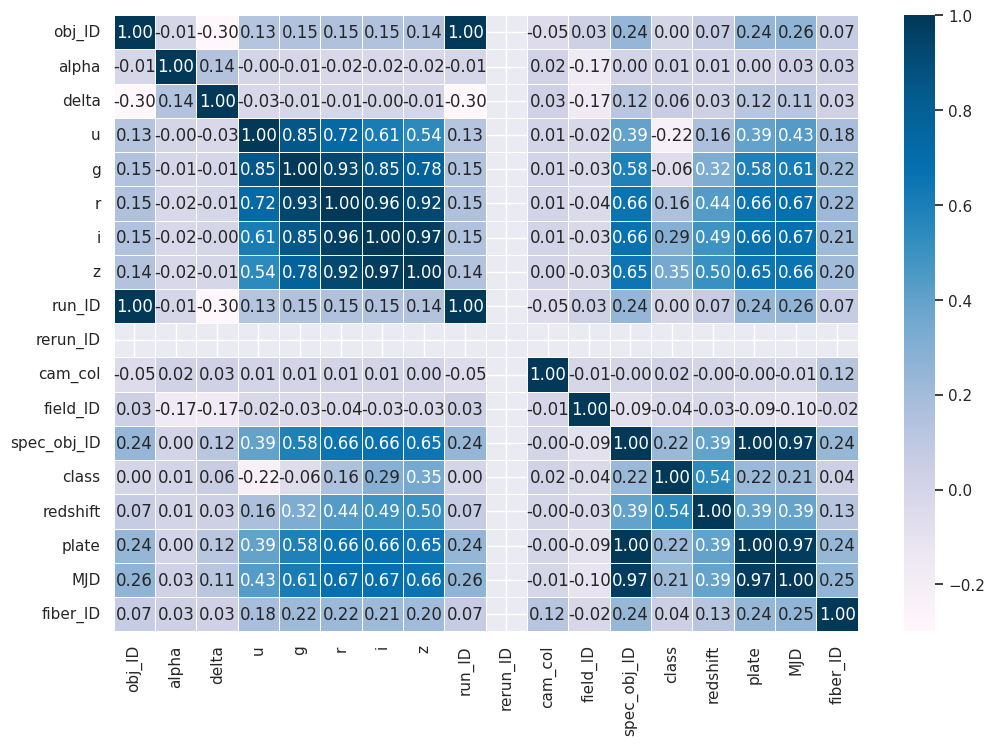

In [6]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [7]:
corr = data.corr()
corr["class"].sort_values()

u             -0.222802
g             -0.058192
field_ID      -0.037542
run_ID         0.000250
obj_ID         0.000252
alpha          0.008187
cam_col        0.017789
fiber_ID       0.037319
delta          0.058947
r              0.160654
MJD            0.214433
spec_obj_ID    0.224718
plate          0.224718
i              0.294075
z              0.349711
redshift       0.541667
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

Выбросим лишние признаки.

In [7]:
data = data.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x = data.drop(['class'], axis = 1)
y = data.loc[:,'class'].values
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 50695, 1: 17890, 2: 16159})
Resampled dataset shape Counter({0: 50695, 2: 50695, 1: 50695})


Подготовим данные (Data scaling)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

Подключим нужные библиотеки и разделим данные на выборки.

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

Начнем обучение методом опорных векторов (SVM).

In [ ]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.971


In [ ]:
classes = ['GALAXY','STAR','QSO']

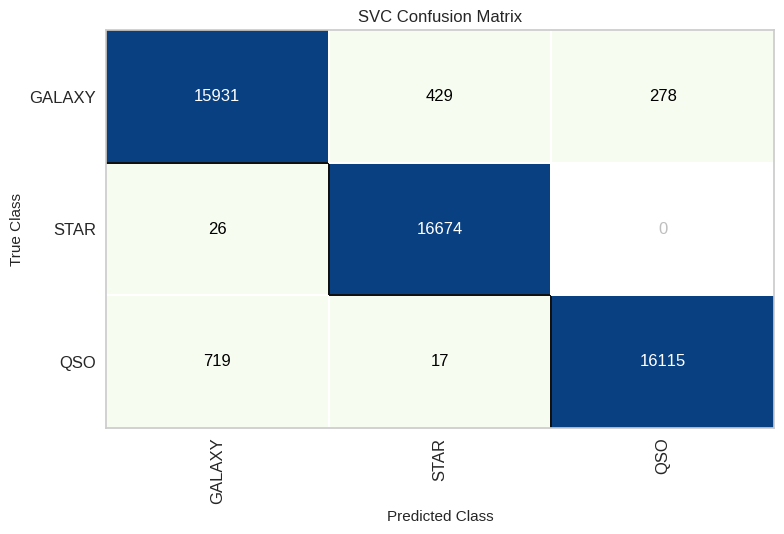

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='GnBu')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16638
           1       0.97      1.00      0.99     16700
           2       0.98      0.96      0.97     16851

    accuracy                           0.97     50189
   macro avg       0.97      0.97      0.97     50189
weighted avg       0.97      0.97      0.97     50189



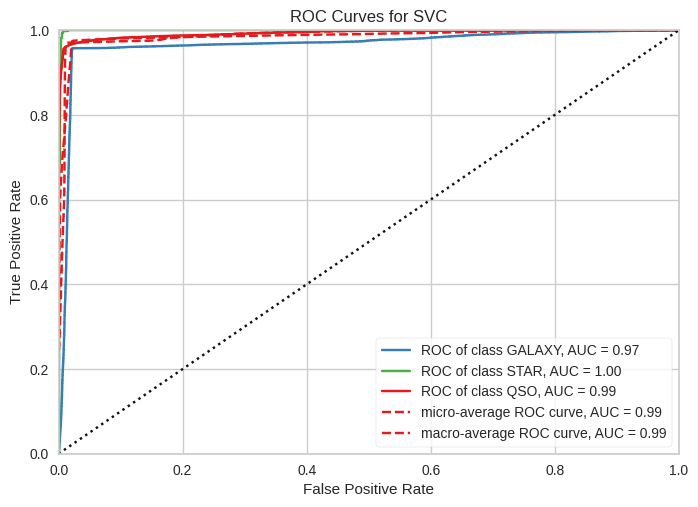

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(svm_clf, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [ ]:
visualizer = ClassPredictionError(svm_clf, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

Как можно видеть, данный классификатор неплохо справляется с задачей.

Попробуем провести кластеризацию с помощью метода k-means.

In [14]:
from sklearn import cluster

In [15]:
data[['u','g']].head(3)

,u,g
0,23.87882,22.27530
1,24.77759,22.83188
3,22.13682,23.77656


In [16]:
kmeans = cluster.KMeans(n_clusters=3,
                        random_state=42) #объявляем класс, который позволит кластеризовать данные

kmeans.fit(data[['u','g']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [17]:
data['class'].values

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
labels = kmeans.predict(data[['u','g']])

In [19]:
labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [20]:

kmeans.cluster_centers_

array([[19.40717018, 18.0237834 ],
       [22.02699735, 21.04377929],
       [24.52461357, 22.48605684]])

In [21]:
p = data[['u','g']].values.copy()
p = (p - np.mean(p,axis=0))/np.std(p,axis=0)

kmeans = cluster.KMeans(n_clusters=3,random_state=42)
labels = kmeans.fit_predict(p)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


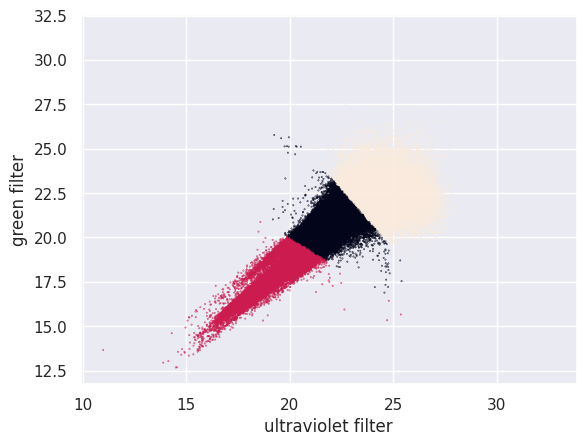

In [24]:
plt.scatter(data['u'],data['g'],s=0.1,c=labels)
plt.xlabel('ultraviolet filter')
plt.ylabel('green filter')
plt.show()


Посмотрим, каким классам в реальности принадлежат точки. Как видно, провести правильную кластеризацию в плоскости (u,v) довольно тяжело

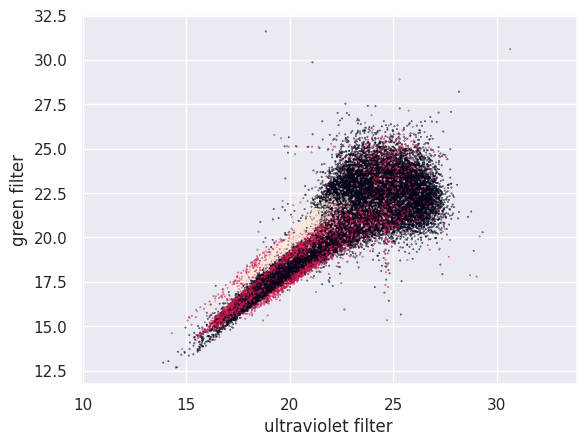

In [26]:
plt.scatter(data['u'],data['g'],s=0.1,c=data['class'].values)
plt.xlabel('ultraviolet filter')
plt.ylabel('green filter')
plt.show()

Рассмотрим другую плоскость (redshift, ultraviolet)
k-means здесь выделяет три кластера, однако они не соответствуют трём классам в реальности

In [27]:
X = data[['redshift','u']].values.copy()
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

kmeans = cluster.KMeans(n_clusters=3,random_state=42)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'ultraviolet')

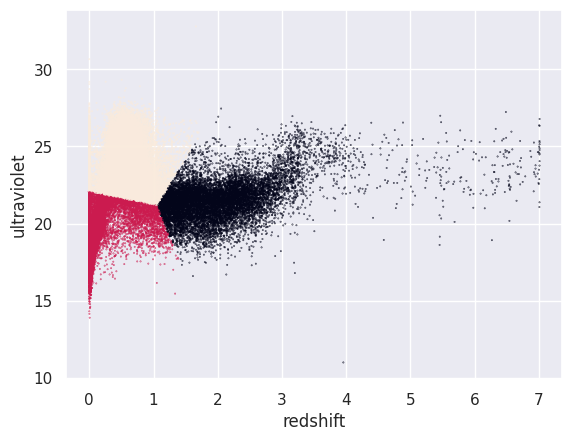

In [28]:
plt.scatter(data['redshift'],data['u'],s=0.1,c=labels)
plt.xlabel("redshift")
plt.ylabel("ultraviolet")

Построим деление точек по классам

Text(0, 0.5, 'ultraviolet')

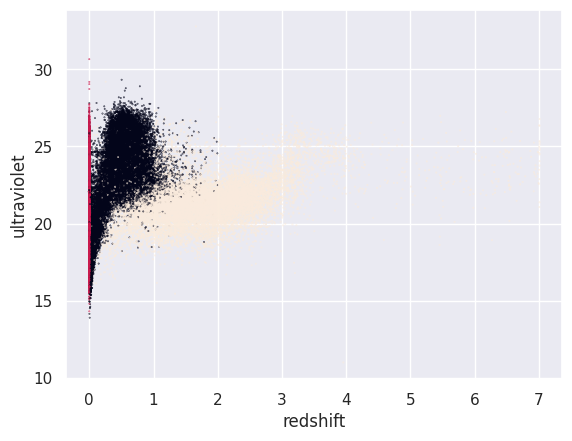

In [22]:
plt.scatter(data['redshift'],data['u'],s=0.1,c=data['class'].values)
plt.xlabel("redshift")
plt.ylabel("ultraviolet")

Воспользуемся методом кластеризации DBSCAN

Text(0, 0.5, 'u')

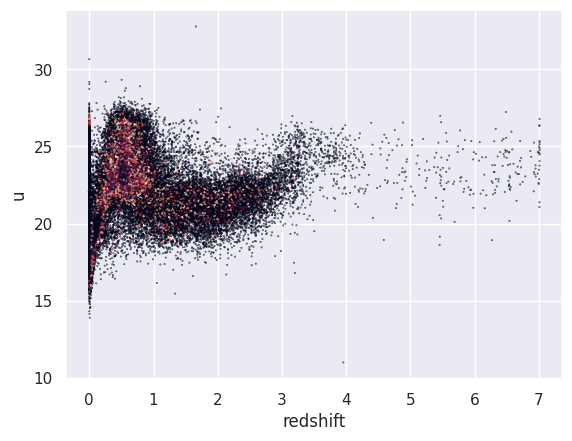

In [29]:
from sklearn.cluster import DBSCAN
h = data[['redshift','u']].values.copy()
h = (h - np.mean(h,axis=0))/np.std(h,axis=0)
clustering = DBSCAN(eps=0.005, min_samples=2).fit(h)
plt.scatter(data['redshift'],data['u'],s=0.1,c=clustering.labels_)
plt.xlabel("redshift")
plt.ylabel("u")

Попробуем оценить, какие из признаков различают галактики, квазары и звезды. Проверим гипотезу о различиях между средними значениями интенсивностей в инфракрасном диапазоне для трёх классов.

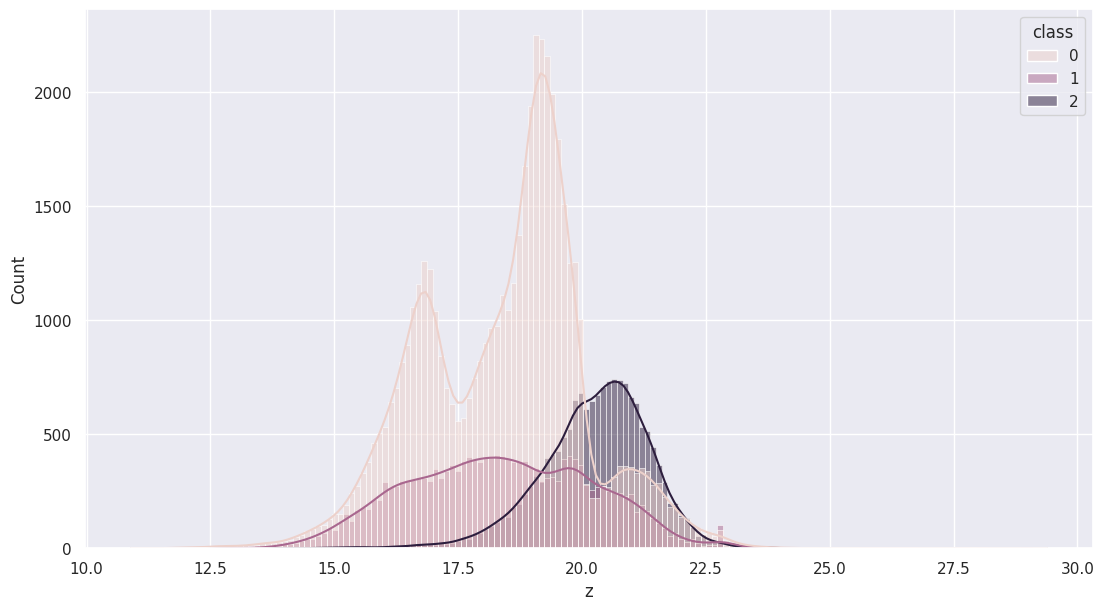

In [33]:
plt.figure(figsize=(13,7))
sns.histplot(data=data, x='z', kde=True, hue="class")
plt.show()

In [39]:
data1=data[data['class']==0]
data2=data[data['class']==1]
data3=data[data['class']==2]

In [48]:
a=data1['z'][:15000]
b=data2['z'][:15000]
c=data3['z'][:15000]

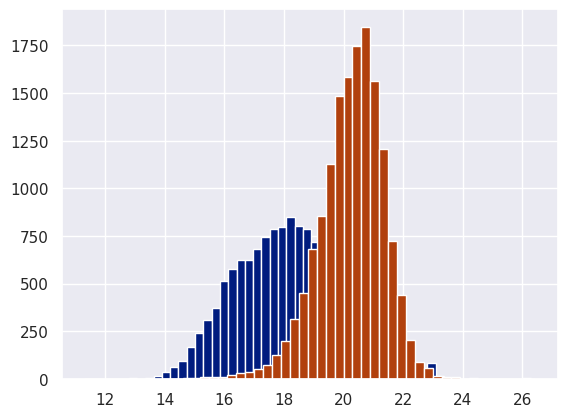

In [55]:
plt.hist(a,bins=50)
plt.hist(b,bins=50)
plt.show()

In [41]:
import scipy.stats as stats

In [52]:
stats.ttest_ind(a,b)

TtestResult(statistic=4.63161632574854, pvalue=3.643435250099041e-06, df=29998.0)

In [56]:
stats.ttest_ind(b,c)

TtestResult(statistic=-108.34007200304964, pvalue=0.0, df=29998.0)

pvalue получился небольшим, можно отвергнуть нулевую гипотезу о равенстве средних независимых выборок